In [1]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import pandas as pd
import tensorflow as tf
import MIDASpy as md
import math


In [2]:
column_names=['column 1','column 2','column 3','column 4','column 5','column 6','column 7','column 8','column 9','column 10','column 11','column 12','column 13']
df=pd.read_excel(r'C:\Users\furqz\OneDrive\Desktop\Data mining stiff\incomplete\Incomplete Datasets Without Labels\Sheart\Sheart_NN_20.xlsx', header=None,names=column_names)
df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12,column 13
0,NaN,NaN,4.0,130.0,322.0,NaN,2.0,109.0,0.0,2.4,2.0,3.0,NaN
1,NaN,NaN,3.0,115.0,564.0,0.0,2.0,NaN,0.0,1.6,2.0,0.0,7.0
2,1.0,57.0,2.0,NaN,261.0,NaN,0.0,141.0,0.0,0.3,1.0,0.0,7.0
3,1.0,64.0,4.0,128.0,263.0,0.0,NaN,NaN,NaN,0.2,NaN,1.0,7.0
4,NaN,NaN,2.0,120.0,269.0,0.0,2.0,121.0,1.0,0.2,1.0,1.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
265,1.0,52.0,NaN,NaN,NaN,1.0,0.0,162.0,0.0,0.5,1.0,0.0,7.0
266,NaN,44.0,NaN,120.0,263.0,NaN,0.0,173.0,NaN,0.0,1.0,0.0,NaN
267,NaN,NaN,2.0,140.0,294.0,0.0,2.0,153.0,NaN,1.3,2.0,0.0,NaN
268,1.0,57.0,4.0,140.0,192.0,0.0,0.0,148.0,0.0,0.4,2.0,0.0,6.0


In [3]:
print('dataType',end='\t')
print('column_names',end='\t')
print('Number of Nulls')
for name in column_names:
    print(df[name].dtype,end='\t\t')
    print(name,end='\t')
    print(df[name].isnull().sum())

dataType	column_names	Number of Nulls
float64		column 1	42
float64		column 2	70
float64		column 3	58
float64		column 4	42
float64		column 5	30
float64		column 6	72
float64		column 7	28
float64		column 8	72
float64		column 9	70
float64		column 10	56
float64		column 11	44
float64		column 12	28
float64		column 13	72


In [4]:
df.describe()

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12,column 13
count,228.000000,200.000000,212.000000,228.000000,240.000000,198.000000,242.000000,198.000000,200.000000,214.000000,226.000000,242.000000,198.000000
mean,0.684211,54.475000,3.179245,131.026316,249.525000,0.136364,1.012397,150.393939,0.355000,1.052336,1.592920,0.636364,4.691919
std,0.465852,8.430584,0.911196,16.612166,50.590813,0.344044,0.999923,20.367596,0.479714,1.125116,0.627335,0.910975,1.930528
min,0.000000,35.000000,1.000000,94.000000,126.000000,0.000000,0.000000,88.000000,0.000000,0.000000,1.000000,0.000000,3.000000
25%,0.000000,48.750000,3.000000,120.000000,215.750000,0.000000,0.000000,140.000000,0.000000,0.000000,1.000000,0.000000,3.000000
50%,1.000000,55.000000,3.000000,130.000000,245.000000,0.000000,2.000000,154.000000,0.000000,0.800000,2.000000,0.000000,3.000000
75%,1.000000,60.000000,4.000000,140.000000,276.250000,0.000000,2.000000,165.000000,1.000000,1.600000,2.000000,1.000000,7.000000
max,1.000000,77.000000,4.000000,192.000000,564.000000,1.000000,2.000000,195.000000,1.000000,6.200000,3.000000,3.000000,7.000000


<AxesSubplot:>

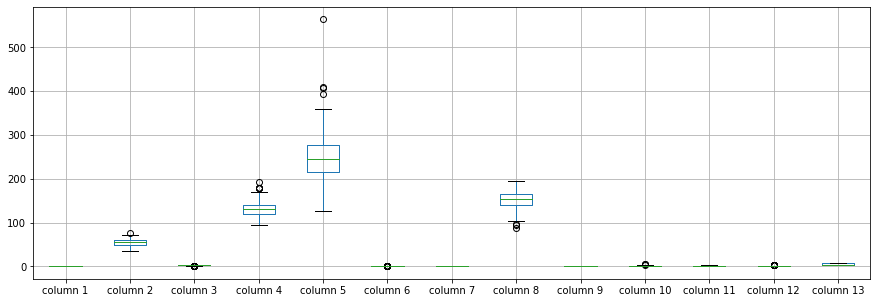

In [5]:
df.boxplot(return_type='axes', figsize=(15,5))

In [6]:
df.mean()

column 1       0.684211
column 2      54.475000
column 3       3.179245
column 4     131.026316
column 5     249.525000
column 6       0.136364
column 7       1.012397
column 8     150.393939
column 9       0.355000
column 10      1.052336
column 11      1.592920
column 12      0.636364
column 13      4.691919
dtype: float64

In [7]:
corr=df.corr()
corr

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12,column 13
column 1,1.000000,-0.095213,0.018547,-0.072960,-0.176779,0.048781,0.013640,-0.186161,0.234980,0.030893,0.115204,0.033266,0.404326
column 2,-0.095213,1.000000,0.014347,0.302256,0.213496,0.097068,0.089903,-0.206244,0.107909,0.163841,0.133657,0.299285,0.125294
column 3,0.018547,0.014347,1.000000,-0.084284,0.086188,-0.090730,0.059522,-0.316761,0.367676,0.289374,0.190989,0.197231,0.250551
column 4,-0.072960,0.302256,-0.084284,1.000000,0.170306,-0.021320,0.115257,0.017597,0.124447,0.127921,0.054694,0.064709,0.153747
column 5,-0.176779,0.213496,0.086188,0.170306,1.000000,0.033483,0.150543,-0.089461,0.106746,0.125830,0.027909,0.130686,0.046885
column 6,0.048781,0.097068,-0.090730,-0.021320,0.033483,1.000000,0.074608,-0.062635,0.017472,-0.022089,0.042703,0.183767,0.115309
column 7,0.013640,0.089903,0.059522,0.115257,0.150543,0.074608,1.000000,-0.098377,0.040636,0.092432,0.123919,0.173509,-0.010012
column 8,-0.186161,-0.206244,-0.316761,0.017597,-0.089461,-0.062635,-0.098377,1.000000,-0.402879,-0.344573,-0.408949,-0.246120,-0.279100
column 9,0.234980,0.107909,0.367676,0.124447,0.106746,0.017472,0.040636,-0.402879,1.000000,0.394167,0.281544,0.104089,0.306707
column 10,0.030893,0.163841,0.289374,0.127921,0.125830,-0.022089,0.092432,-0.344573,0.394167,1.000000,0.588547,0.335106,0.279768


In [8]:
tf.compat.v1.reset_default_graph()
import tensorflow.compat.v1 as tf
tf.reset_default_graph()


In [9]:
imputer = md.Midas(layer_structure = [13,13+101,13+101+101,13+101+101+101,13+101+101+101+101,13+101+101+101+101+101,13+101+101+101+101,13+101+101+101,13+101+101,13+101,13], vae_layer = False, seed = 101)
imputer.build_model(df)
imputer.train_model(training_epochs=50)


Size index: [13]

Computation graph constructed

Model initialised

Epoch: 0 , loss: 502.95032501220703
Epoch: 1 , loss: 502.0244827270508
Epoch: 2 , loss: 498.80189323425293
Epoch: 3 , loss: 500.8293972015381
Epoch: 4 , loss: 500.34750175476074
Epoch: 5 , loss: 499.9668140411377
Epoch: 6 , loss: 503.3212203979492
Epoch: 7 , loss: 502.21642303466797
Epoch: 8 , loss: 500.13947677612305
Epoch: 9 , loss: 505.29652976989746
Epoch: 10 , loss: 502.45823669433594
Epoch: 11 , loss: 500.65170669555664
Epoch: 12 , loss: 500.1961040496826
Epoch: 13 , loss: 496.8742923736572
Epoch: 14 , loss: 497.91598320007324
Epoch: 15 , loss: 494.4964065551758
Epoch: 16 , loss: 494.13689041137695
Epoch: 17 , loss: 493.52705001831055
Epoch: 18 , loss: 495.0004062652588
Epoch: 19 , loss: 491.92303466796875
Epoch: 20 , loss: 490.51859855651855
Epoch: 21 , loss: 489.6482524871826
Epoch: 22 , loss: 485.3338222503662
Epoch: 23 , loss: 483.9420280456543
Epoch: 24 , loss: 472.7240409851074
Epoch: 25 , loss: 435.1562232

In [10]:
imputations=imputer.generate_samples(m=15).output_list
np.shape(imputations[-1])

INFO:tensorflow:Restoring parameters from tmp/MIDAS
Model restored.


(270, 13)

In [11]:
new_df=imputations[-1]
new_df.iloc[21,:]


column 1       1.000000
column 2      66.193954
column 3       2.000000
column 4     130.000000
column 5     249.217545
column 6       0.000000
column 7       2.000000
column 8     180.000000
column 9       0.000000
column 10      1.146276
column 11      2.000000
column 12      0.000000
column 13      3.000000
Name: 21, dtype: float64

In [12]:
complete_df=pd.read_excel(r'C:\Users\furqz\OneDrive\Desktop\Data mining stiff\complete\Original Datasets Without Labels\Sheart.xlsx', header=None,names=column_names)

In [13]:
new_df-complete_df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12,column 13
0,-0.714246,-39.928827,0.000000,0.000000,0.0000,0.273742,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,-1.948272
1,0.326664,-2.851990,0.000000,0.000000,0.0000,0.000000,0.000000,0.871735,0.000000,0.0,0.000000,0.000000,0.000000
2,0.000000,0.000000,0.000000,12.299149,0.0000,0.396800,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
3,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.739341,9.352325,-1.245480,0.0,-0.807021,0.000000,0.000000
4,0.565493,-37.580055,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
265,0.000000,0.000000,-0.601060,-92.955292,-88.8283,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
266,-0.917594,0.000000,4.006821,0.000000,0.0000,0.968980,0.000000,0.000000,-0.791913,0.0,0.000000,0.000000,-5.707465
267,0.247364,48.222786,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,-0.884978,0.0,0.000000,0.000000,0.126086
268,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000


Calculating NRMSE Value

In [14]:

def Sum_new(sum):
    summ=0
    for n in sum:
        summ=summ+n
    return (summ)



In [15]:
def Frobenius_norm(number):
    num=number
    abs_val=num.abs()
    power_abs=abs_val**2
    sum1=power_abs.sum()
    total_sum=Sum_new(sum1)
    return(math.sqrt(total_sum))

In [16]:
numerator=Frobenius_norm(new_df-complete_df)
denominator=Frobenius_norm(complete_df)
numerator, denominator

(1182.542743273946, 5414.752392307519)

In [17]:
NRMS=numerator/denominator
NRMS


0.21839276435870422

In [18]:
new_df.iloc[66,:]

column 1       1.00000
column 2      51.00000
column 3       4.00000
column 4     140.00000
column 5     261.00000
column 6       0.72429
column 7       2.00000
column 8     186.00000
column 9       1.00000
column 10      0.00000
column 11      1.00000
column 12      0.00000
column 13      3.00000
Name: 66, dtype: float64

In [19]:
imputations[-1]


,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12,column 13
0,0.285754,30.071173,4.000000,130.000000,322.0000,0.273742,2.000000,109.000000,0.000000,2.4,2.000000,3.000000,1.051728
1,0.326664,64.148010,3.000000,115.000000,564.0000,0.000000,2.000000,160.871735,0.000000,1.6,2.000000,0.000000,7.000000
2,1.000000,57.000000,2.000000,136.299149,261.0000,0.396800,0.000000,141.000000,0.000000,0.3,1.000000,0.000000,7.000000
3,1.000000,64.000000,4.000000,128.000000,263.0000,0.000000,0.739341,114.352325,-0.245480,0.2,1.192979,1.000000,7.000000
4,0.565493,36.419945,2.000000,120.000000,269.0000,0.000000,2.000000,121.000000,1.000000,0.2,1.000000,1.000000,3.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
265,1.000000,52.000000,2.398940,79.044708,110.1717,1.000000,0.000000,162.000000,0.000000,0.5,1.000000,0.000000,7.000000
266,0.082406,44.000000,6.006821,120.000000,263.0000,0.968980,0.000000,173.000000,-0.791913,0.0,1.000000,0.000000,1.292535
267,0.247364,104.222786,2.000000,140.000000,294.0000,0.000000,2.000000,153.000000,-0.884978,1.3,2.000000,0.000000,3.126086
268,1.000000,57.000000,4.000000,140.000000,192.0000,0.000000,0.000000,148.000000,0.000000,0.4,2.000000,0.000000,6.000000


In [20]:
imputations[-1].to_excel("Sheart_NN_20(imp).xlsx", index=False, header=False)